In [12]:
# Cell 1: Imports and Paths
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fpdf import FPDF
from PIL import Image

# Paths
csv_path = "classified_contract.csv"   # Your LegalBERT output CSV
summary_path = "contract_abstractive_summary.txt"  # Your GEN AI summary
graphs_dir = "Graphs"
output_pdf = "Contract_Analysis_Report.pdf"

# Create directory for graphs if it doesn't exist
os.makedirs(graphs_dir, exist_ok=True)

# Read CSV and summary
df = pd.read_csv(csv_path)
with open(summary_path, "r", encoding="utf-8") as f:
    summary_text = f.read()

df.head()


,predicted_class_id,Predicted Label,Tier,Clause
0,39,Revenue-Profit Sharing,2,FORM OF\nFRANCHISE AGREEMENT\nLocation of the ...
1,10,Document Name,5,TERM; SUCCESSOR FRANCHISE AGREEMENTS 4
2,38,Renewal Term-Answer,3,BUSINESS RECORDS AND REPORTING 19
3,15,Expiration Date-Answer,5,MARKETING FUND AND ADVERTISING 21
4,38,Renewal Term-Answer,3,CONFIDENTIAL INFORMATION 26


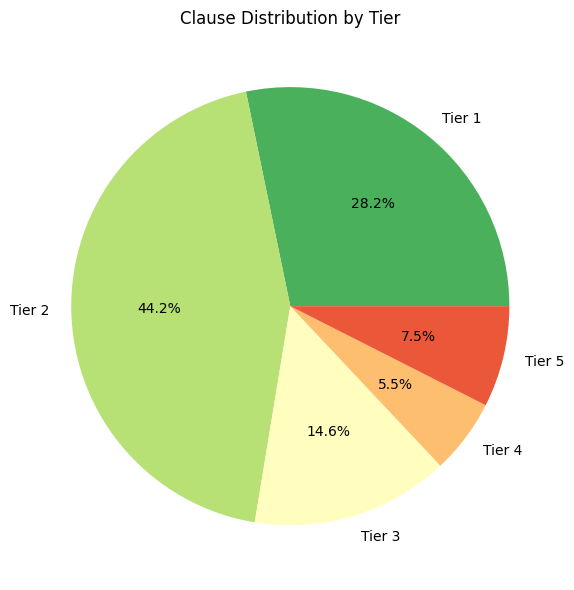

In [16]:
# Cell 2: Tier Distribution Pie Chart
tier_counts = df['Tier'].value_counts().sort_index()
plt.figure(figsize=(6,6))
colors = sns.color_palette("RdYlGn_r", len(tier_counts))
plt.pie(tier_counts, labels=[f"Tier {i}" for i in tier_counts.index], autopct='%1.1f%%', colors=colors)
plt.title("Clause Distribution by Tier")
plt.tight_layout()
plt.savefig(os.path.join(graphs_dir, "tier_distribution.png"))
plt.show()


C:\Users\bharg\AppData\Local\Temp\ipykernel_17352\1147978033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette="viridis")


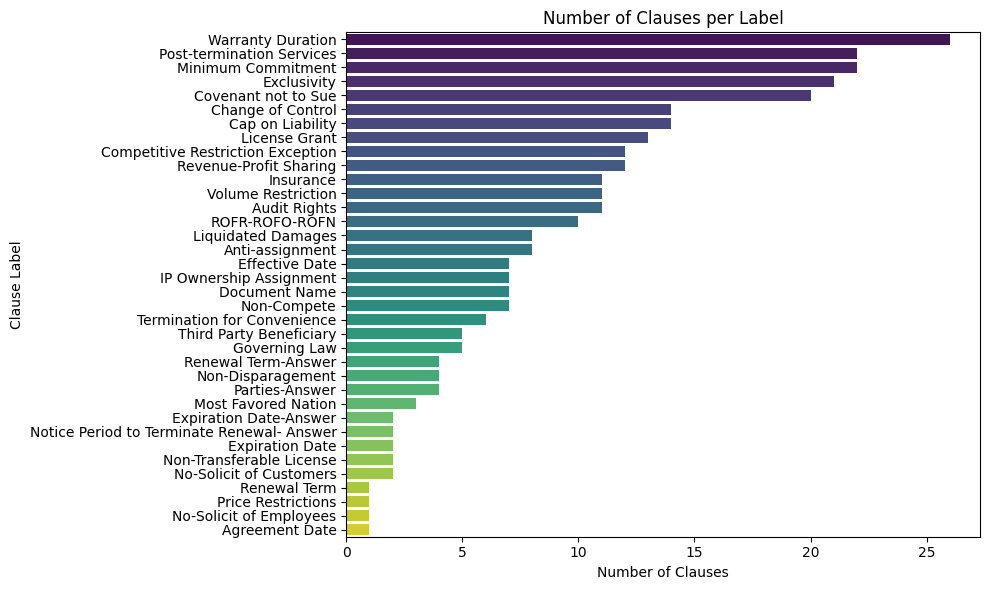

In [17]:
# Cell 3: Label Frequency Bar Chart
label_counts = df['Predicted Label'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette="viridis")
plt.xlabel("Number of Clauses")
plt.ylabel("Clause Label")
plt.title("Number of Clauses per Label")
plt.tight_layout()
plt.savefig(os.path.join(graphs_dir, "label_frequency.png"))
plt.show()


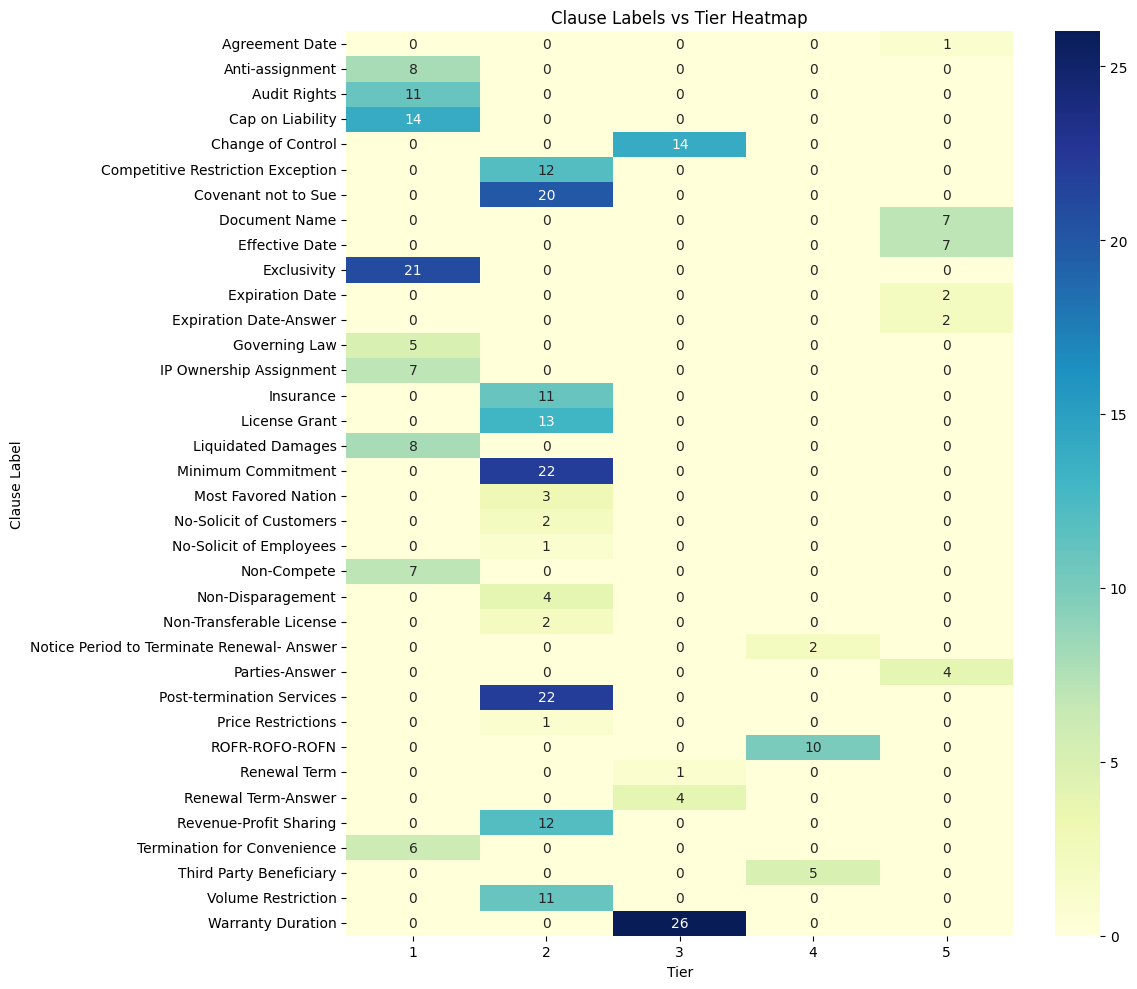

In [18]:
# Cell 4: Tier vs Label Heatmap
tier_label_matrix = pd.crosstab(df['Predicted Label'], df['Tier'])
plt.figure(figsize=(12,10))
sns.heatmap(tier_label_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Clause Labels vs Tier Heatmap")
plt.ylabel("Clause Label")
plt.xlabel("Tier")
plt.tight_layout()
plt.savefig(os.path.join(graphs_dir, "tier_label_heatmap.png"))
plt.show()


C:\Users\bharg\AppData\Local\Temp\ipykernel_17352\585382158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_labels.values, y=top5_labels.index, palette="coolwarm")


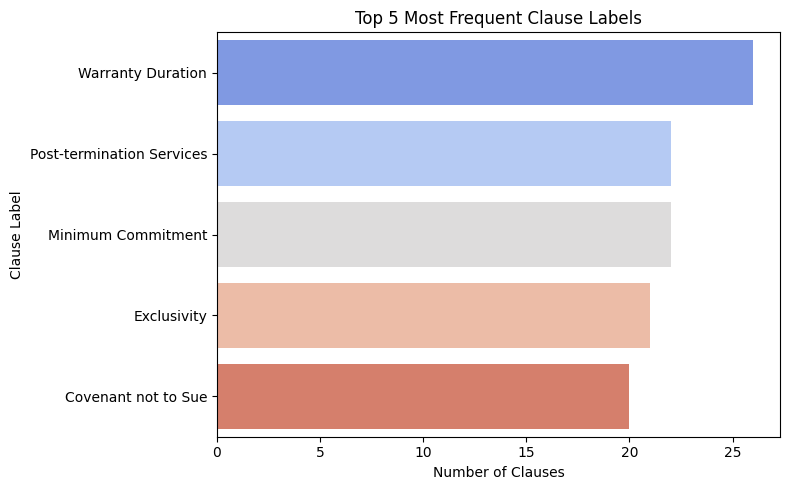

In [19]:
# Cell 5: Top 5 Most Frequent Labels
top5_labels = label_counts.head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top5_labels.values, y=top5_labels.index, palette="coolwarm")
plt.xlabel("Number of Clauses")
plt.ylabel("Clause Label")
plt.title("Top 5 Most Frequent Clause Labels")
plt.tight_layout()
plt.savefig(os.path.join(graphs_dir, "top5_labels.png"))
plt.show()


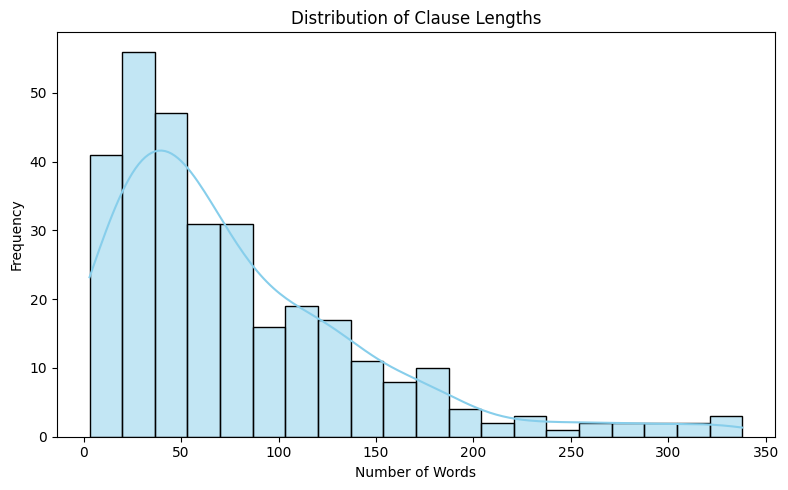

In [20]:
# Cell 6: Clause Length Distribution
df['Clause_Length'] = df['Clause'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(df['Clause_Length'], bins=20, kde=True, color="skyblue")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Clause Lengths")
plt.tight_layout()
plt.savefig(os.path.join(graphs_dir, "clause_length_distribution.png"))
plt.show()


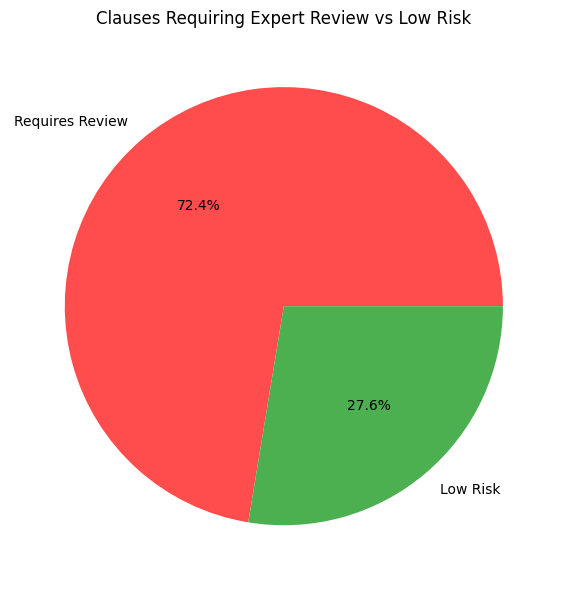

In [21]:
# Cell 7: Expert Review vs Low Risk
df['Review_Need'] = df['Tier'].apply(lambda x: 'Requires Review' if x <=2 else 'Low Risk')
review_counts = df['Review_Need'].value_counts()
plt.figure(figsize=(6,6))
colors = ["#FF4C4C", "#4CAF50"]
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Clauses Requiring Expert Review vs Low Risk")
plt.tight_layout()
plt.savefig(os.path.join(graphs_dir, "review_vs_lowrisk.png"))
plt.show()


In [26]:
# Cell 8: PDF Generation with ReportLab
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import Paragraph, SimpleDocTemplate, Spacer, Image
from reportlab.lib.enums import TA_LEFT
from reportlab.lib.units import inch
from reportlab.lib import colors

# Paths
summary_path = "contract_abstractive_summary.txt"
output_pdf = "Contract_Analysis_Report.pdf"

# Read the summary
with open(summary_path, "r", encoding="utf-8") as f:
    summary_text = f.read()

# Create PDF document
doc = SimpleDocTemplate(output_pdf, pagesize=A4,
                        rightMargin=50, leftMargin=50,
                        topMargin=50, bottomMargin=50)

# Styles
styles = getSampleStyleSheet()
styles.add(ParagraphStyle(name='MyHeading1',
                          fontName='Times-Bold',
                          fontSize=16,
                          spaceAfter=14))
styles.add(ParagraphStyle(name='MyHeading2',
                          fontName='Times-Bold',
                          fontSize=14,
                          spaceAfter=10))
styles.add(ParagraphStyle(name='MyBodyText',
                          fontName='Times-Roman',
                          fontSize=12,
                          leading=18,
                          spaceAfter=8))
styles.add(ParagraphStyle(name='MyBullet',
                          fontName='Times-Roman',
                          fontSize=12,
                          leading=16,
                          leftIndent=20,
                          spaceAfter=4))

# Prepare PDF elements
elements = []

# Main Heading
elements.append(Paragraph("Comprehensive Contract Analysis Report", styles['Heading1']))
elements.append(Spacer(1, 12))

# Split summary into lines
lines = summary_text.split('\n')
for line in lines:
    line = line.strip()
    if not line:
        continue
    # Bold lines that start with "Key Obligations" or contain ":"
    if line.startswith("**") or ":" in line:
        line = line.replace("**", "")  # Remove Markdown bold markers
        elements.append(Paragraph(line, styles['Heading2']))
    elif line.startswith("-"):
        # Bullet points
        line = line.lstrip("- ").strip()
        elements.append(Paragraph("• " + line, styles['Bullet']))
    else:
        elements.append(Paragraph(line, styles['BodyText']))

elements.append(Spacer(1, 12))

# Add Graphs to the PDF
graph_files = [
    ("tier_distribution.png", "Clause Distribution by Tier"),
    ("label_frequency.png", "Number of Clauses per Label"),
    ("tier_label_heatmap.png", "Clause Labels vs Tier Heatmap"),
    ("top5_labels.png", "Top 5 Most Frequent Clause Labels"),
    ("clause_length_distribution.png", "Distribution of Clause Lengths"),
    ("review_vs_lowrisk.png", "Clauses Requiring Expert Review vs Low Risk")
]

for gf, title in graph_files:
    elements.append(Paragraph(title, styles['Heading2']))
    elements.append(Spacer(1, 6))
    img_path = os.path.join(graphs_dir, gf)
    if os.path.exists(img_path):
        img = Image(img_path, width=6.5*inch, height=4*inch)  # Resize graphs to fit
        elements.append(img)
        elements.append(Spacer(1,12))

# Build PDF
doc.build(elements)
print(f"✅ PDF report generated: {output_pdf}")


✅ PDF report generated: Contract_Analysis_Report.pdf
